In [2]:
import numpy as np
import matplotlib.pyplot as plt

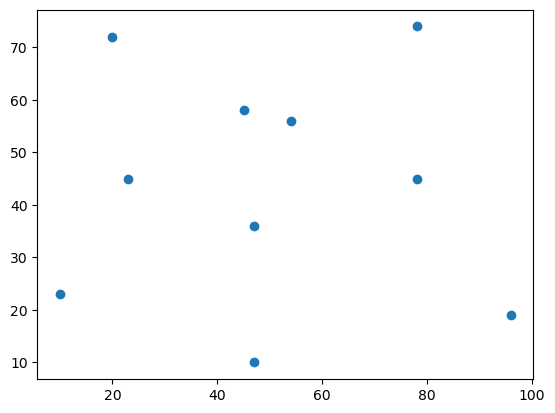

In [37]:
# 2D to 1D tranform using PCA

data=np.array([[10,23],
               [23,45],
               [45,58],
               [54,56],
               [47,10],
               [78,45],
               [20,72],
               [47,36],
               [78,74],
               [96,19]])
plt.scatter(data[:,0],data[:,1])

In [10]:
#for feature scaling the data set

from sklearn.preprocessing import StandardScaler
obj=StandardScaler()
scaled_data=obj.fit_transform(data)
scaled_data

array([[-1.5073595 , -1.00171483],
       [-1.01500589,  0.05779124],
       [-0.1817921 ,  0.68386301],
       [ 0.15906809,  0.58754428],
       [-0.10604539, -1.6277866 ],
       [ 1.06802859,  0.05779124],
       [-1.12862595,  1.35809414],
       [-0.10604539, -0.37564306],
       [ 1.06802859,  1.45441288],
       [ 1.74974896, -1.1943523 ]])

In [22]:
#for PCA

from sklearn.decomposition import PCA
model=PCA(n_components=1)   # how many number of PCs want to create 

model.fit(scaled_data)

PCA(n_components=1)

In [16]:
model.explained_variance_  # get how many data points are inside the PC by PC ,  If the value is high then the large number of data points are inside that relevvant PC

array([1.15273786, 1.06948436])

In [19]:
model.explained_variance_ratio_  # get the ratio about data fitting with PC as a 100% precentage rate

array([0.51873204, 0.48126796])

In [29]:
#reduce originl data dimensions by reducing PCs

pca_scaled_data=model.transform(scaled_data)
# reduce original data dimension into one PC

In [30]:
model.transform(scaled_data).shape #reduce column into one

(10, 1)

In [34]:
pca_scaled_data=model.inverse_transform(pca_scaled_data) #inverse the tranform again

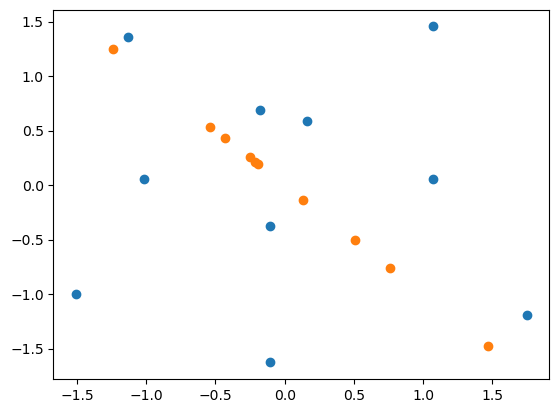

In [36]:
plt.scatter(scaled_data[:,0],scaled_data[:,1])
plt.scatter(pca_scaled_data[:,0],pca_scaled_data[:,1])  #get the 1D line for 2D dataset

In [41]:
# For high dimension data set

from sklearn.datasets import load_digits
digits=load_digits()
digits.data.shape   # get inbulit 64D dataest

(1797, 64)

In [47]:
#reduce dimension using PCA

from sklearn.decomposition import PCA
model_2=PCA(n_components=2)   #2 number of PCs want to create 
pca_digits_data=model_2.fit_transform(digits.data)  #get tranform of 64D -> 2D
pca_digits_data.shape

(1797, 2)

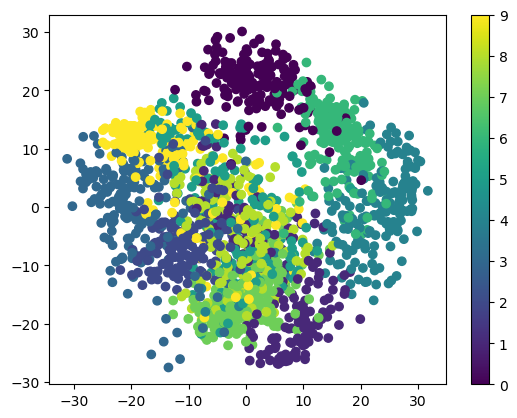

In [52]:
plt.scatter(pca_digits_data[:,0],pca_digits_data[:,1],c=digits.target)  # c -> classes anuwa data set ek beda gnnva
plt.colorbar()

In [56]:
# Determine model speed based of number of components

#feature scaling the data set
scaled_digits_data=obj.fit_transform(digits.data)
scaled_digits_data.shape

(1797, 64)

In [54]:
#divide whole dataset for train and test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_digits_data,digits.target,test_size=0.2,random_state=42)

In [68]:
from sklearn.linear_model import LogisticRegression
mod=LogisticRegression(solver='lbfgs',max_iter=1000)

#get the model training time

import time
start=time.time()
mod.fit(x_train,y_train)
end=time.time()
print("The trainning time is (ms): "+str((end-start)*1000))

The trainning time is (ms): 69.9608325958252


In [73]:
# measure the accuracy

from sklearn.metrics import accuracy_score
accuracy_score(y_test,mod.predict(x_test))  # accuracy with 64D dataset

0.9722222222222222

In [80]:
# get PCA and reduce dimensions to 10D

from sklearn.decomposition import PCA
model_3=PCA(n_components=10)   
pca_digits_data_new=model_3.fit_transform(scaled_digits_data.data)  
pca_digits_data_new.shape

(1797, 10)

In [81]:
#divide whole dataset for train and test

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(pca_digits_data_new,digits.target,test_size=0.2,random_state=42)
x_train.shape

(1437, 10)

In [82]:
from sklearn.linear_model import LogisticRegression
mod=LogisticRegression(solver='lbfgs',max_iter=1000)

#get the model training time

import time
start=time.time()
mod.fit(x_train,y_train)
end=time.time()
print("The trainning time is (ms) for 10D datset: "+str((end-start)*1000))

The trainning time is (ms) for 10D datset: 169.15369033813477


In [83]:
# measure the accuracy

from sklearn.metrics import accuracy_score
accuracy_score(y_test,mod.predict(x_test))  # accuracy with 10D dataset

0.9